Primero recorto las imagenes sentinel para tenerlas del tamaño de los partidos

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
import libpysal.weights as weights
import esda

# Configuración de visualización
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.precision', 3)

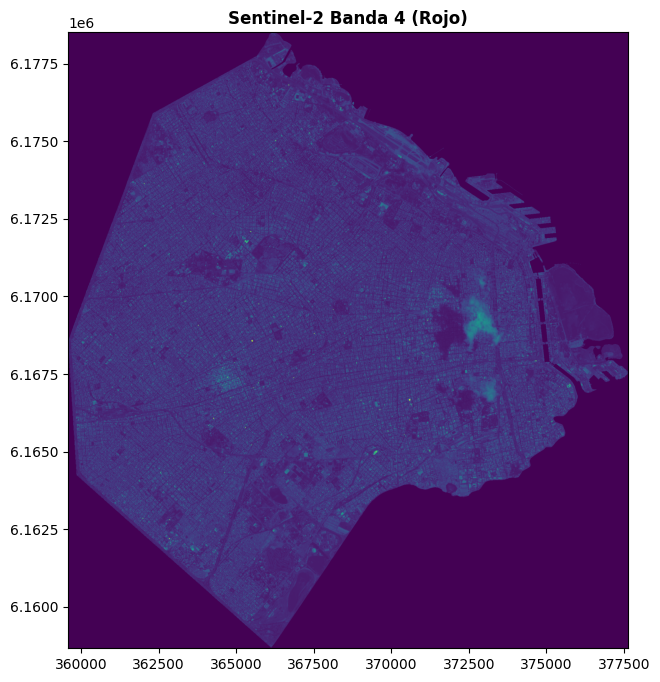

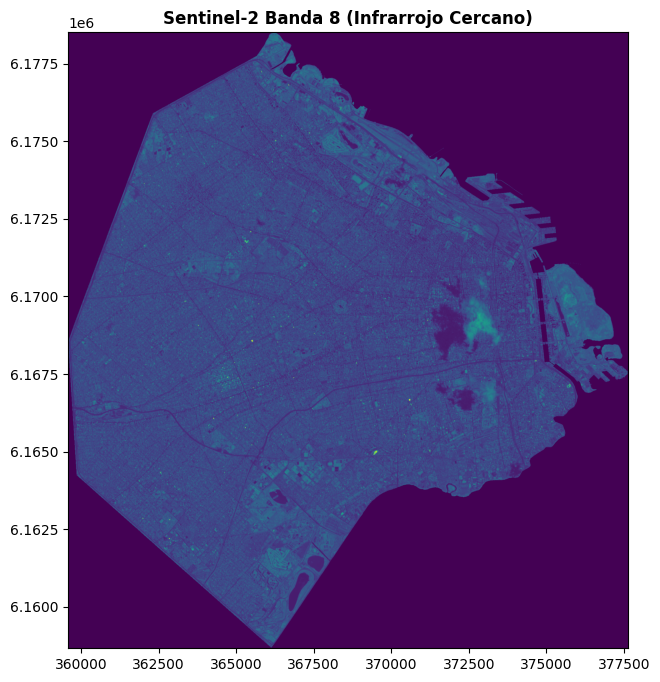

In [2]:
S2_B04_CABA = 'data/S2_B04_CABA.tif'
S2_B08_CABA = 'data/S2_B08_CABA.tif'

# banda R
with rasterio.open(S2_B04_CABA) as src_b4:
    fig, ax = plt.subplots(figsize=(8, 8))
    show(src_b4, ax=ax, title="Sentinel-2 Banda 4 (Rojo)")
    plt.show()

# banda NIR
with rasterio.open(S2_B08_CABA) as src_b8:
    fig, ax = plt.subplots(figsize=(8, 8))
    show(src_b8, ax=ax, title="Sentinel-2 Banda 8 (Infrarrojo Cercano)")
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16548\2230802396.py:8: RuntimeWarning: invalid value encountered in divide
  (b8 - b4) / (b8 + b4)


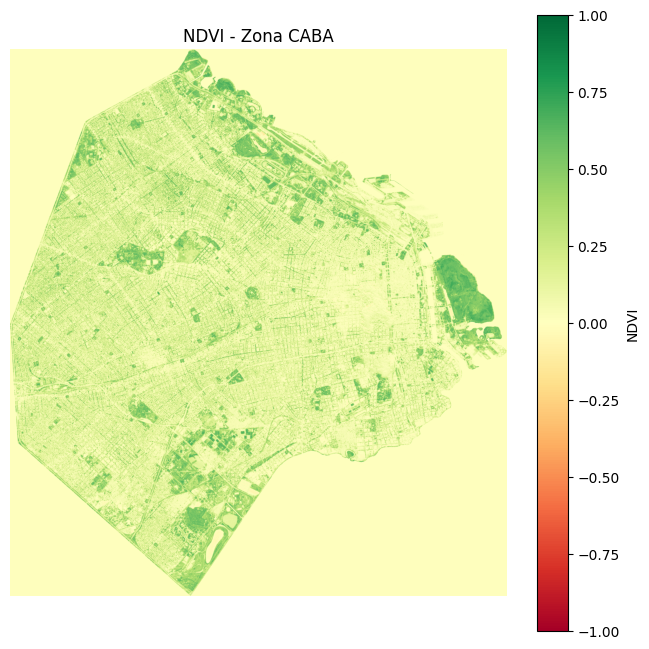

In [3]:
with rasterio.open(S2_B04_CABA) as red, rasterio.open(S2_B08_CABA) as nir:
    b4 = red.read(1).astype('float32')
    b8 = nir.read(1).astype('float32')

    ndvi = np.where(
        (b8 + b4) == 0,
        0,
        (b8 - b4) / (b8 + b4)
    )

plt.figure(figsize=(8, 8))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label="NDVI")
plt.title("NDVI - Zona CABA")
plt.axis('off')
plt.show()